## Linear Regression

In [2]:
# importing libraries
#for versions checkout requirements.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

from sklearn.metrics import mean_squared_error

#import linear regression
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split

In [80]:
#importing and reading data sets

#The goal is to predict a person's life expectancy based on their BMI at birth
data = pd.read_csv("bmi_and_life.csv")

In [4]:
#look at top 5 rows in data set
data.head()

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


In [81]:
#get the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 3 columns):
Country            163 non-null object
Life expectancy    163 non-null float64
BMI                163 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [82]:
#delete/drop 'Country' variable.
data = data.drop(['Country'], axis = 1)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 2 columns):
Life expectancy    163 non-null float64
BMI                163 non-null float64
dtypes: float64(2)
memory usage: 2.7 KB


it says that you have 163 rows and 2columns

In [84]:
#reading into variables
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values
X.shape

(163, 1)

## Split the Dataset

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.33, random_state = 0)

In [87]:
# get the shape of training
X_train.shape

(109, 1)

# Visualizing the training set

Text(0, 0.5, 'BMI')

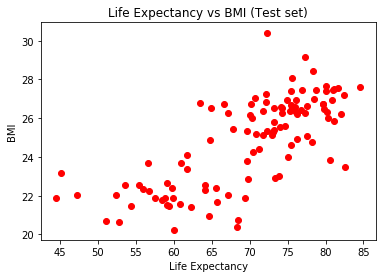

In [85]:
plt.scatter(X_train, y_train, color = 'red')

plt.title('Life Expectancy vs BMI (Test set)')
plt.xlabel('Life Expectancy')
plt.ylabel('BMI')

## Model import

In [18]:
lr = LinearRegression()

In [19]:

y_test.shape
#fitting the model
lr.fit(X_train,y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)


# Visualizing the Test set results

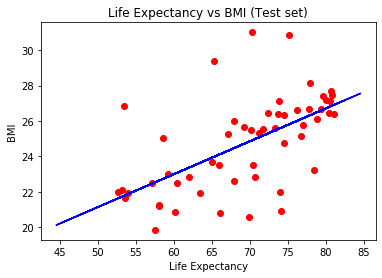

In [33]:

plt.scatter(X_test, y_test, color = 'red')
#plt.scatter(X_test,y_pred, color = 'black')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Life Expectancy vs BMI (Test set)')
plt.xlabel('Life Expectancy')
plt.ylabel('BMI')
plt.show()

# Example 2: applying linear regression on diabetes dataset using sklearn

In [22]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

## split dataset manually

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]



# Visualazing training set

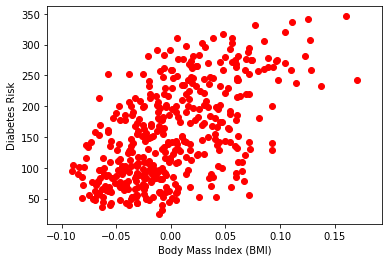

In [33]:
plt.scatter(diabetes_X_train, diabetes_y_train, color = 'red')
#plt.scatter(X_test,y_pred, color = 'black')

plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.show()

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07


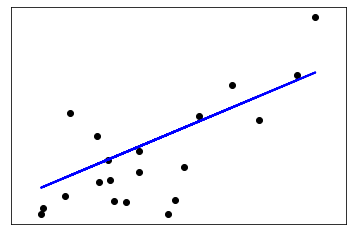

In [34]:

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))



# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

# Linear regression using gradient decent from scratch

In [51]:

diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_Y[-20:]

Text(0, 0.5, 'Diabetes Risk')

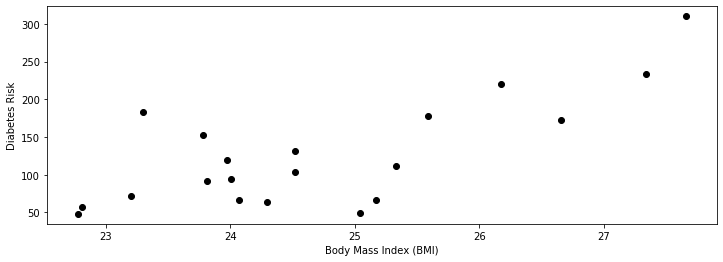

In [52]:
plt.rcParams['figure.figsize'] = [12, 4]
plt.scatter(diabetes_X_train, diabetes_y_train, color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

In [87]:
#diabetes_X_train,diabetes_X_test,diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X,diabetes_X, test_size = 0.80, random_state = 0)

In [35]:

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

## Create predict function

In [40]:
## y=theta0+theta1*x
def predict(theta0, theta1, x):
  
    return theta0+theta1*x
   

## Create fit funciton-  applying gradient decent 

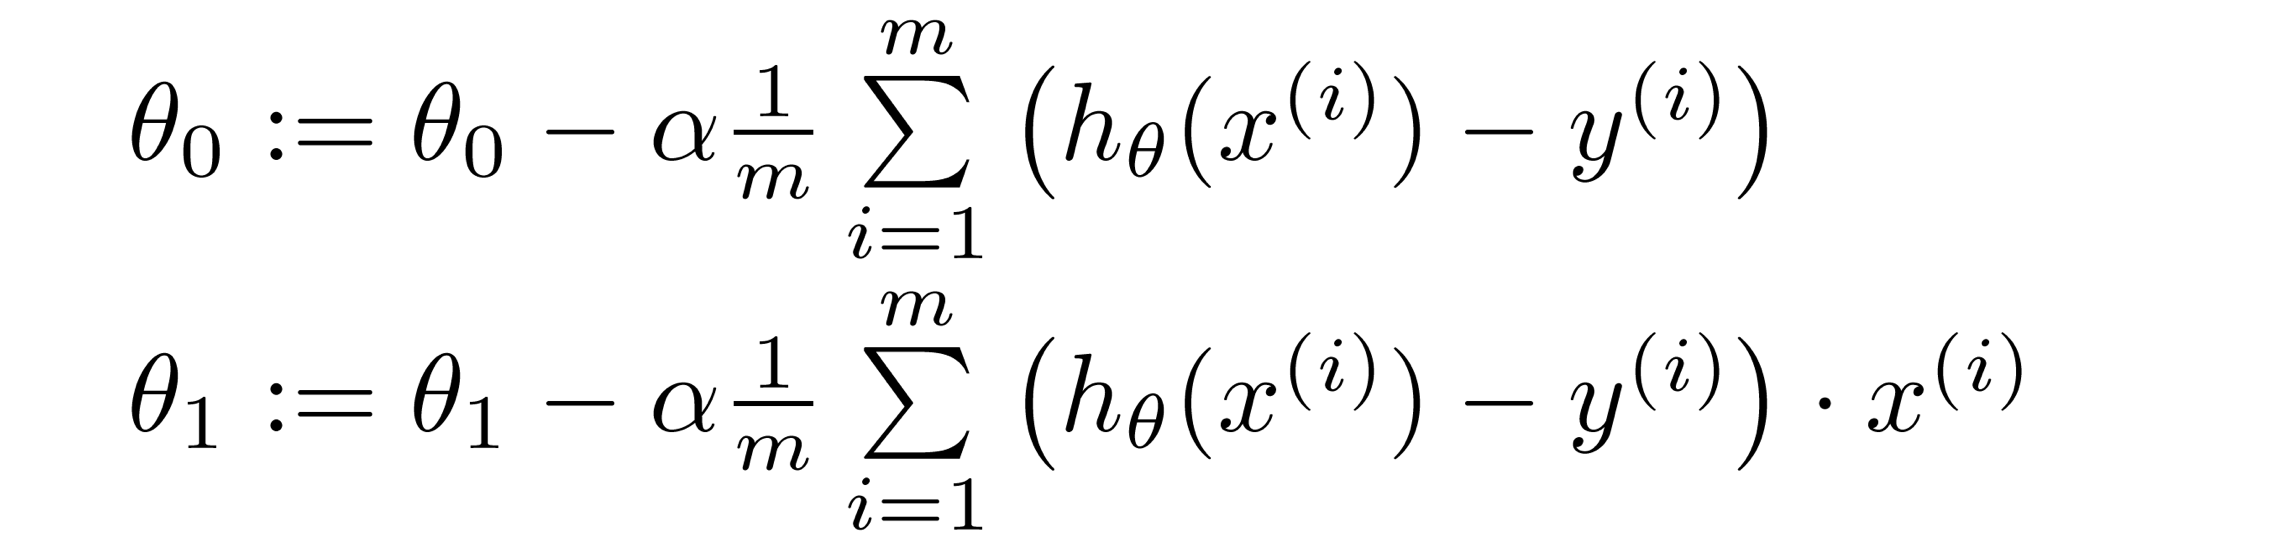

In [69]:
## applying gradient decent 
def fit(X,Y, lr=0.3, epochs=1000):
    theta0=0
    theta1=0
    errors=[]
    for epoch in range(epochs):
        d_theta0=0
        d_theta1=0
        err=0.
        for x, y in zip(X,Y): 
     
            y_pred= predict(theta0, theta1, x)
            err=err+np.abs(y-y_pred)
            d_theta0=d_theta0+(y_pred-y)*1
            d_theta1=d_theta1 +(y_pred-y)*x
        ## once you cacluclate the gradient for all exmaples in the training set
        ## update the theta0 and theta 1
        
        theta0=theta0 - lr*((1/X.shape[0])*d_theta0)
        theta1=theta1 - lr*((1/X.shape[0])*d_theta1)
        errors.append(err)
        
    print(theta0,theta1)
    print(len(errors))
    plt.plot(list(range(epochs)),errors)
    plt.show()
    return theta0, theta1


[153.14422333] [462.77003144]
1000


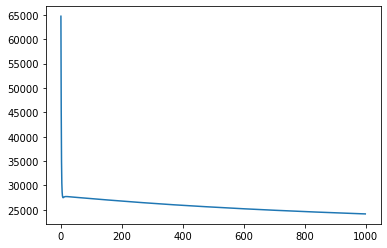

In [70]:
theta_0, theta_1=fit(diabetes_X_train, diabetes_y_train)

In [58]:
y11=predict(theta_0,theta_1,diabetes_X_test)

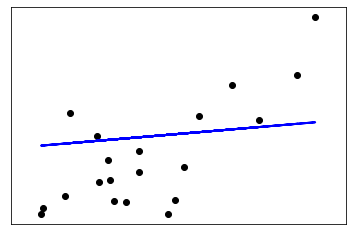

In [75]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, y11, color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

In [72]:
## 
y_hat=predict(theta_0, theta_1, diabetes_y_train[0])
print(y_hat, diabetes_y_test[0])

[70031.41897139] 233.0


# Linear regression in keras

In [73]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv("brain-body.csv", delimiter=",")
data

,Index,BrainWeight,BodyWeight
0,1,3.385,44.5
1,2,0.480,15.5
2,3,1.350,8.1
3,4,465.000,423.0
4,5,36.330,119.5
...,...,...,...
57,58,160.000,169.0
58,59,0.900,2.6
59,60,1.620,11.4
60,61,0.104,2.5


In [36]:
X = data[['BrainWeight']].values
Y = data[['BodyWeight']].values

In [40]:
## build the model using keras 
model = Sequential()
model.add(Dense(units=1, input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(Adam(lr=0.8), 'mean_squared_error')
history=model.fit(X, Y, epochs=50)

Epoch 1/50
2/2 [==============================] - 0s 2ms/step - loss: 1405096.3750
Epoch 2/50
2/2 [==============================] - 0s 3ms/step - loss: 128988.5312
Epoch 3/50
2/2 [==============================] - 0s 2ms/step - loss: 431077.3438
Epoch 4/50
2/2 [==============================] - 0s 1ms/step - loss: 609235.8750
Epoch 5/50
2/2 [==============================] - 0s 5ms/step - loss: 478438.9688
Epoch 6/50
2/2 [==============================] - 0s 2ms/step - loss: 162449.7031
Epoch 7/50
2/2 [==============================] - 0s 3ms/step - loss: 251040.4844
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 301122.7500
Epoch 9/50
2/2 [==============================] - 0s 2ms/step - loss: 215567.4062
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 122788.5234
Epoch 11/50
2/2 [==============================] - 0s 4ms/step - loss: 133145.3594
Epoch 12/50
2/2 [==============================] - 0s 4ms/step - loss: 167920.6562
Epoch 13/50


In [43]:
Y_predict = model.predict(X)


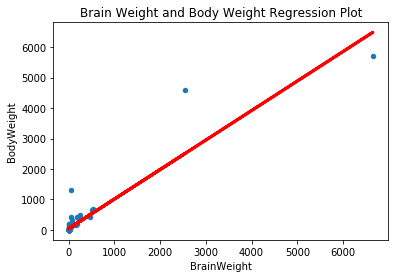

In [44]:
data.plot(kind='scatter',
          x = 'BrainWeight',
          y = 'BodyWeight',
          title='Brain Weight and Body Weight Regression Plot')

plt.plot(X, Y_predict, color='red', linewidth=3)
plt.show()

# Polynomial linear regression in sklearn

In [48]:
from sklearn.preprocessing import PolynomialFeatures 

In [51]:
polynomial_features = PolynomialFeatures()
polynomial_features.fit(X,Y)


PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [52]:
Y_predict1 = polynomial_features.predict(X)

AttributeError: 'PolynomialFeatures' object has no attribute 'predict'